<a href="https://colab.research.google.com/github/DOMINION-JOHN1/Volatilty-index-price-prediction/blob/main/GoldPred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import GridSearchCV
import yfinance as yf

In [2]:
import sys
print(sys.version)


3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]


In [3]:
stock_symbol = 'GC=F'
start_date = '1985-01-01'
end_date = '2023-11-11'

# Fetch historical data using yfinance
data = yf.download(stock_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [4]:
data=pd.DataFrame(data)
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-08-30,273.899994,273.899994,273.899994,273.899994,273.899994,0
2000-08-31,274.799988,278.299988,274.799988,278.299988,278.299988,0
2000-09-01,277.000000,277.000000,277.000000,277.000000,277.000000,0
2000-09-05,275.799988,275.799988,275.799988,275.799988,275.799988,2
2000-09-06,274.200012,274.200012,274.200012,274.200012,274.200012,0
...,...,...,...,...,...,...
2023-11-06,1981.599976,1981.599976,1977.400024,1981.599976,1981.599976,130
2023-11-07,1966.500000,1966.800049,1960.699951,1966.800049,1966.800049,20
2023-11-08,1967.800049,1967.800049,1947.699951,1951.500000,1951.500000,43


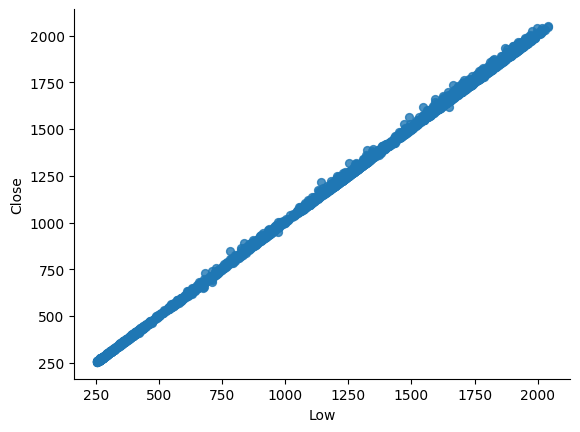

In [5]:
from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Low', y='Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [6]:
# Convert the "Date" column to a datetime object
data.index = pd.to_datetime(data.index)

# Create a new column for the month of the year (as numbers)
data['Month_Num'] = data.index.month

# Create a new column for the day of the week (as numbers, where Monday is 0 and Sunday is 6)
data['Day_of_Week_Num'] = data.index.dayofweek

# Display the DataFrame with the new columns
data

,Open,High,Low,Close,Adj Close,Volume,Month_Num,Day_of_Week_Num
Date,,,,,,,,
2000-08-30,273.899994,273.899994,273.899994,273.899994,273.899994,0,8,2
2000-08-31,274.799988,278.299988,274.799988,278.299988,278.299988,0,8,3
2000-09-01,277.000000,277.000000,277.000000,277.000000,277.000000,0,9,4
2000-09-05,275.799988,275.799988,275.799988,275.799988,275.799988,2,9,1
2000-09-06,274.200012,274.200012,274.200012,274.200012,274.200012,0,9,2
...,...,...,...,...,...,...,...,...
2023-11-06,1981.599976,1981.599976,1977.400024,1981.599976,1981.599976,130,11,0
2023-11-07,1966.500000,1966.800049,1960.699951,1966.800049,1966.800049,20,11,1
2023-11-08,1967.800049,1967.800049,1947.699951,1951.500000,1951.500000,43,11,2


In [7]:
df = data.reset_index(drop=True).drop(columns=['Adj Close'])
df

,Open,High,Low,Close,Volume,Month_Num,Day_of_Week_Num
0,273.899994,273.899994,273.899994,273.899994,0,8,2
1,274.799988,278.299988,274.799988,278.299988,0,8,3
2,277.000000,277.000000,277.000000,277.000000,0,9,4
3,275.799988,275.799988,275.799988,275.799988,2,9,1
4,274.200012,274.200012,274.200012,274.200012,0,9,2
...,...,...,...,...,...,...,...
5816,1981.599976,1981.599976,1977.400024,1981.599976,130,11,0
5817,1966.500000,1966.800049,1960.699951,1966.800049,20,11,1
5818,1967.800049,1967.800049,1947.699951,1951.500000,43,11,2
5819,1951.699951,1964.199951,1945.300049,1964.199951,10,11,3


In [8]:
df['Next Close'] = df['Close'].shift(-1)
df

,Open,High,Low,Close,Volume,Month_Num,Day_of_Week_Num,Next Close
0,273.899994,273.899994,273.899994,273.899994,0,8,2,278.299988
1,274.799988,278.299988,274.799988,278.299988,0,8,3,277.000000
2,277.000000,277.000000,277.000000,277.000000,0,9,4,275.799988
3,275.799988,275.799988,275.799988,275.799988,2,9,1,274.200012
4,274.200012,274.200012,274.200012,274.200012,0,9,2,274.000000
...,...,...,...,...,...,...,...,...
5816,1981.599976,1981.599976,1977.400024,1981.599976,130,11,0,1966.800049
5817,1966.500000,1966.800049,1960.699951,1966.800049,20,11,1,1951.500000
5818,1967.800049,1967.800049,1947.699951,1951.500000,43,11,2,1964.199951
5819,1951.699951,1964.199951,1945.300049,1964.199951,10,11,3,1932.599976


In [9]:
 df.dropna(inplace=True)

In [10]:
x = df.drop(['Next Close'], axis=1)
y = df['Next Close']


In [11]:
scaler=StandardScaler()

In [12]:
X=scaler.fit_transform(x)

In [13]:
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

# Create a TimeSeriesSplit instance with 3 splits
tscv = TimeSeriesSplit(n_splits=6)

# Split the data
for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    "Train:", X_train, y_train
    "Test:", X_test, y_test


In [14]:
X_train.shape

(4989, 7)

In [15]:
X_test.shape

(831, 7)

In [16]:

X_train_reshaped = X_train.reshape(X_train.shape[0], 1, 7)  # Assuming 7 input features


X_test_reshaped = X_test.reshape(X_test.shape[0], 1, 7)  # Assuming 7 input features

X_test_reshaped.shape



(831, 1, 7)

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

# Build the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(1, 7), activation='relu', return_sequences=True))
model.add(LSTM(64, activation='relu', return_sequences=True))
model.add(LSTM(124, activation='relu', return_sequences=True))
model.add(LSTM(124, activation='relu'))
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')  # You can use a different loss function depending on your problem

# Define a ModelCheckpoint callback
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_loss', save_best_only=True, mode='min', verbose=1)

# Train the model with the callback
model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_data=(X_test_reshaped, y_test), callbacks=[checkpoint])

# Evaluate the model and make predictions
loss = model.evaluate(X_test_reshaped, y_test)
print(f"Test loss: {loss}")


Epoch 1/100
155/156 [============================>.] - ETA: 0s - loss: 739577.6250
Epoch 1: val_loss improved from inf to 933353.37500, saving model to best_model.h5
156/156 [==============================] - 9s 19ms/step - loss: 736029.0000 - val_loss: 933353.3750
Epoch 2/100
153/156 [============================>.] - ETA: 0s - loss: 58953.0859
Epoch 2: val_loss improved from 933353.37500 to 94565.47656, saving model to best_model.h5
156/156 [==============================] - 2s 15ms/step - loss: 58457.5781 - val_loss: 94565.4766
Epoch 3/100
155/156 [============================>.] - ETA: 0s - loss: 18681.0957
Epoch 3: val_loss improved from 94565.47656 to 18786.93555, saving model to best_model.h5
156/156 [==============================] - 3s 19ms/step - loss: 18646.8242 - val_loss: 18786.9355
Epoch 4/100
156/156 [==============================] - ETA: 0s - loss: 7315.8130
Epoch 4: val_loss improved from 18786.93555 to 5699.74170, saving model to best_model.h5
156/156 [==============

In [36]:
predictions= model.predict(X_test_reshaped)


26/26 [==============================] - 1s 4ms/step


In [37]:
predictions

array([[1902.3903],
       [1942.4854],
       [1945.8997],
       [1985.99  ],
       [1943.7134],
       [1971.5574],
       [1969.432 ],
       [2005.0991],
       [2030.9333],
       [2049.5374],
       [2008.4181],
       [2032.7495],
       [1919.3009],
       [1923.1748],
       [1955.5842],
       [1939.8939],
       [1992.6559],
       [1990.3999],
       [1950.9407],
       [1930.9548],
       [1928.3834],
       [1935.9557],
       [1911.2396],
       [1944.2012],
       [1926.0117],
       [1966.3927],
       [1970.9783],
       [1969.804 ],
       [1930.1062],
       [1924.4994],
       [1923.286 ],
       [1924.241 ],
       [1943.5118],
       [1955.0869],
       [1936.8711],
       [1957.0819],
       [1956.6963],
       [1957.3905],
       [1938.2468],
       [1949.8938],
       [1899.5801],
       [1896.6324],
       [1858.9225],
       [1868.2778],
       [1856.9996],
       [1880.9891],
       [1894.8317],
       [1886.5577],
       [1906.4459],
       [1900.6215],


In [38]:
np.array([y_test])

array([[1931.        , 1944.69995117, 1953.5       , 1942.30004883,
        1962.80004883, 1966.        , 2001.19995117, 2031.09997559,
        2051.5       , 2010.09997559, 2024.40002441, 1932.59997559,
        1934.90002441, 1956.69995117, 1937.        , 1985.        ,
        1999.40002441, 1958.69995117, 1933.80004883, 1934.59997559,
        1927.69995117, 1911.80004883, 1940.69995117, 1921.59997559,
        1964.59997559, 1967.59997559, 1968.19995117, 1934.40002441,
        1927.59997559, 1923.90002441, 1933.        , 1944.69995117,
        1954.19995117, 1937.80004883, 1953.09997559, 1956.30004883,
        1960.19995117, 1940.        , 1952.09997559, 1901.19995117,
        1898.59997559, 1859.90002441, 1868.30004883, 1857.69995117,
        1872.80004883, 1894.30004883, 1887.5       , 1908.40002441,
        1900.19995117, 1912.5       , 1901.09997559, 1883.59997559,
        1888.59997559, 1919.5       , 1922.5       , 1888.5       ,
        1901.30004883, 1903.19995117, 1900.80004

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [40]:
mean_absolute_error(y_test[:-1], predictions[:-1])


13.633094438300075

In [41]:
mean_squared_error(y_test[:-1], predictions[:-1])

348.9141169922359

In [42]:
test= np.array([y_test])

In [43]:
pred=np.array(predictions)

In [44]:
y_test_1d = test.reshape(-1)

In [45]:
pred_1d = pred.reshape(-1)

In [46]:
new = pd.DataFrame({'True': y_test_1d, 'Prediction':pred_1d})
new['Date'] = np.arange(len(new))

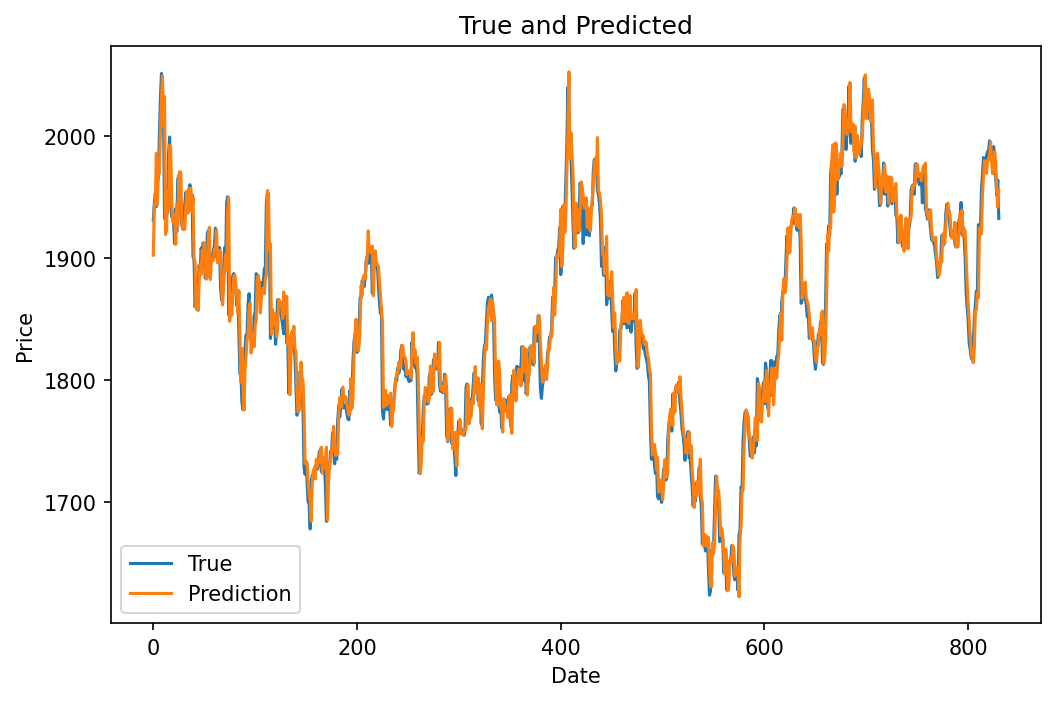

In [47]:
plt.figure(figsize=(8,5), dpi=150)
plt.plot(new['Date'], new['True'], label='True')
plt.plot(new['Date'], new['Prediction'], label='Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('True and Predicted')
plt.legend()


In [48]:
model.save('GOLDCLOSE.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [49]:
import tensorflow as tf

print(tf.__version__)


2.14.0


In [50]:
pip freeze > requirements.txt

In [51]:
!pip --version


pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
